<a href="https://colab.research.google.com/github/Nikhil-Kudupudi/StoryTellingWithData/blob/main/Lab_03_Grammar_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(90deg, #17a2b8 0%, #0e5a63 60%, #0a3d44 100%); color: white; padding: 18px 25px; margin-bottom: 20px;">
    <div style="display: flex; justify-content: space-between; align-items: baseline;">
        <h1 style="font-family: 'Helvetica Neue', sans-serif; font-size: 24px; margin: 0; font-weight: 300;">
            Lab 3: The Grammar of Graphics
        </h1>
        <span style="font-size: 11px; opacity: 0.9;">© Prof. Dehghani</span>
    </div>
    <p style="font-size: 13px; margin-top: 6px; margin-bottom: 0; opacity: 0.9;">
        Understanding Visual Encoding and Statistical Graphics | Building on Lab 1
    </p>
</div>

<div style="background: white; padding: 15px 20px; margin-bottom: 12px; border-left: 3px solid #17a2b8;">
    <h3 style="color: #17a2b8; font-size: 14px; margin: 0 0 8px 0; text-transform: uppercase; letter-spacing: 0.5px;">What is the Grammar of Graphics?</h3>
    <p style="color: #555; line-height: 1.6; margin: 0; font-size: 13px;">
        The Grammar of Graphics is a framework for thinking about visualizations as compositions of data, mappings, and geometric objects. Created by <a href="https://en.wikipedia.org/wiki/Leland_Wilkinson" style="color: #17a2b8;">Leland Wilkinson</a>, this concept revolutionized how we build charts by breaking them into semantic components. Just as grammar provides rules for constructing sentences, the grammar of graphics provides rules for constructing visualizations.
    </p>
</div>

<table style="width: 100%; border-spacing: 12px;">
<tr>
<td style="background: white; padding: 12px 15px; border-top: 3px solid #17a2b8; vertical-align: top; width: 50%;">
    <h4 style="color: #17a2b8; font-size: 13px; margin: 0 0 8px 0; font-weight: 600;">What You'll Learn Today</h4>
    <ul style="color: #555; line-height: 1.4; margin: 0; padding-left: 18px; font-size: 12px;">
        <li>Visual encoding principles</li>
        <li>Scatter plots for relationships</li>
        <li>Histograms for distributions</li>
        <li>Subplots for complex stories</li>
        <li>Color theory in data</li>
    </ul>
</td>
<td style="background: white; padding: 12px 15px; border-top: 3px solid #00acc1; vertical-align: top; width: 50%;">
    <h4 style="color: #00acc1; font-size: 13px; margin: 0 0 8px 0; font-weight: 600;">Lab Structure</h4>
    <div style="color: #555; font-size: 12px; line-height: 1.6;">
        <div style="padding: 2px 0;"><strong>Section 1:</strong> Setup & Visual Encoding (10 min)</div>
        <div style="padding: 2px 0;"><strong>Section 2:</strong> Scatter Plots (20 min)</div>
        <div style="padding: 2px 0;"><strong>Section 3:</strong> Histograms (20 min)</div>
        <div style="padding: 2px 0;"><strong>Section 4:</strong> Subplots (15 min)</div>
        <div style="padding: 2px 0;"><strong>Section 5:</strong> Color Theory (10 min)</div>
    </div>
</td>
</tr>
</table>

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 1: Setup and Visual Encoding Principles</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Let's explore how our brains process visual information and why certain encodings work better than others.
    </p>
</div>

In [1]:
# ============================================
# CELL 1: Welcome & Setup
# Purpose: Import libraries and welcome student
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Welcome message
student_name = input("Welcome back to Data Visualization! What's your name? ")
print(f"\n🎉 Hello {student_name}! Welcome to Lab 2: The Grammar of Graphics!")
print(f"Today we'll dive deeper into how visualizations communicate information.\n")

Welcome back to Data Visualization! What's your name? Nikhil

🎉 Hello Nikhil! Welcome to Lab 2: The Grammar of Graphics!
Today we'll dive deeper into how visualizations communicate information.



In [2]:
# ============================================
# CELL 2: Enhanced Pretty Print Function
# Purpose: Create beautiful output displays
# ============================================

def pretty_print(title, content, style='info'):
    """Display formatted output in a styled box"""
    themes = {
        'info': {'primary': '#17a2b8', 'secondary': '#0e5a63', 'background': '#f8f9fa'},
        'success': {'primary': '#28a745', 'secondary': '#155724', 'background': '#f8fff9'},
        'warning': {'primary': '#ffc107', 'secondary': '#e0a800', 'background': '#fffdf5'}
    }

    theme = themes.get(style, themes['info'])

    html = f'''
    <div style="border-radius: 5px; margin: 10px 0; width: 20cm; max-width: 20cm;
                box-sizing: border-box; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
        <div style="background: linear-gradient(90deg, {theme['primary']} 0%, {theme['secondary']} 100%);
                    padding: 10px 15px; border-radius: 5px 5px 0 0;">
            <strong style="color: white; font-size: 14px;">{title}</strong>
        </div>
        <div style="background: {theme['background']}; padding: 10px 15px; border-radius: 0 0 5px 5px;
                    border-left: 3px solid {theme['primary']};">
            <div style="color: rgba(0,0,0,0.8); font-size: 12px; line-height: 1.5;">{content}</div>
        </div>
    </div>
    '''
    display(HTML(html))

pretty_print("Visual Encoding Channels",
             f"Welcome {student_name}! Today we'll explore how position, size, color, and shape encode data.",
             'info')

<div style="background: white; padding: 15px 20px; margin-bottom: 12px; border-left: 3px solid #17a2b8;">
    <h3 style="color: #17a2b8; font-size: 14px; margin: 0 0 8px 0;">Visual Encoding Principles</h3>
    <p style="color: #555; line-height: 1.6; margin: 0; font-size: 13px;">
        According to <a href="https://en.wikipedia.org/wiki/Jacques_Bertin" style="color: #17a2b8;">Jacques Bertin's</a> seminal work, visual variables include position, size, shape, value, color, orientation, and texture. Research by <a href="https://www.cs.ubc.ca/~tmm/" style="color: #17a2b8;">Tamara Munzner</a> shows that position is the most accurate channel for encoding quantitative data, followed by length and angle.
    </p>
</div>

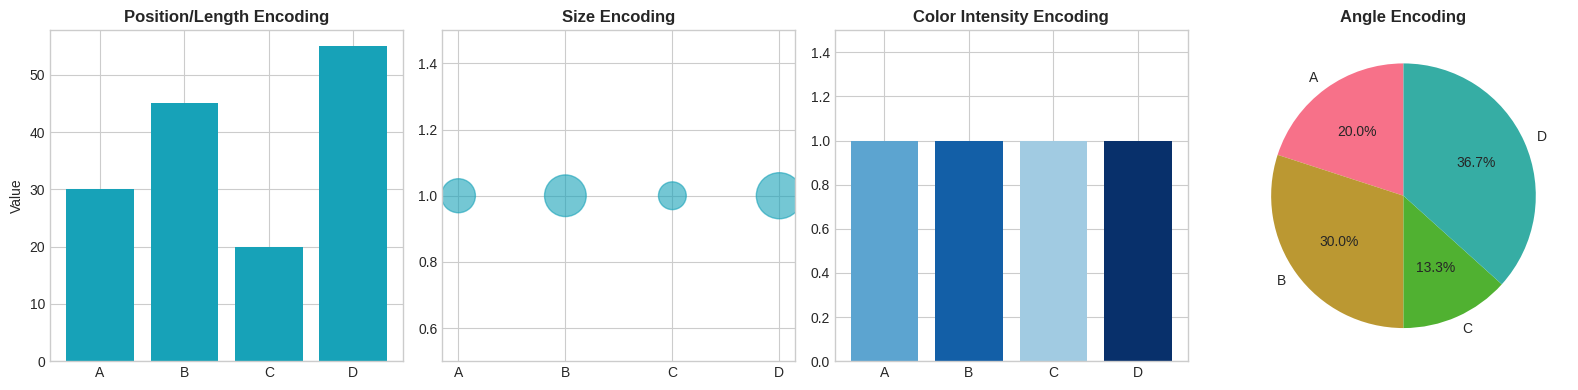

In [3]:
# ============================================
# CELL 3: Demonstrating Visual Encoding
# Purpose: Show different encoding channels
# ============================================

# Create sample data
np.random.seed(42)
categories = ['A', 'B', 'C', 'D']
values = [30, 45, 20, 55]

# Create figure with 4 different encodings
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Position encoding (bar chart)
axes[0].bar(categories, values, color='#17a2b8')
axes[0].set_title('Position/Length Encoding', fontweight='bold')
axes[0].set_ylabel('Value')

# Size encoding (bubble chart)
x_pos = [1, 2, 3, 4]
axes[1].scatter(x_pos, [1]*4, s=[v*20 for v in values], color='#17a2b8', alpha=0.6)
axes[1].set_title('Size Encoding', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(categories)
axes[1].set_ylim(0.5, 1.5)

# Color encoding
colors_map = plt.cm.Blues(np.array(values)/max(values))
axes[2].bar(categories, [1]*4, color=colors_map)
axes[2].set_title('Color Intensity Encoding', fontweight='bold')
axes[2].set_ylim(0, 1.5)

# Angle encoding (pie chart)
axes[3].pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Angle Encoding', fontweight='bold')

plt.tight_layout()
plt.show()

pretty_print("Encoding Effectiveness",
             "Notice how position/length (leftmost) is easiest to compare accurately, while angles (rightmost) are harder to judge precisely.",
             'info')

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 2: Scatter Plots - Revealing Relationships</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Scatter plots excel at showing relationships between two continuous variables.
    </p>
</div>

<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">SCATTER PLOTS: RELATIONSHIPS & CORRELATIONS</h3>
    </div>
    <p style="color: #555; line-height: 1.6; margin: 0 0 15px 0; font-size: 13px;">
        Scatter plots use Cartesian coordinates to display values for two variables. Each point represents an observation. First used by <a href="https://en.wikipedia.org/wiki/Francis_Galton" style="color: #17a2b8;">Francis Galton</a> in the 1880s, they remain the best way to identify correlations, clusters, and outliers. The pattern of points reveals relationships: linear, exponential, or no relationship at all.
    </p>
    <div style="display: flex; gap: 15px;">
        <div style="flex: 1; background: #e8f5e8; padding: 12px; border-radius: 5px; border-left: 4px solid #28a745;">
            <h4 style="color: #28a745; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Good Use Cases:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Height vs weight relationships</li>
                <li>Price vs quality correlations</li>
                <li>Test scores vs study time</li>
                <li>Temperature vs ice cream sales</li>
            </ul>
        </div>
        <div style="flex: 1; background: #fdf2f2; padding: 12px; border-radius: 5px; border-left: 4px solid #dc3545;">
            <h4 style="color: #dc3545; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Bad Use Cases:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Time series data (use line charts)</li>
                <li>Categorical comparisons</li>
                <li>Single variable analysis</li>
                <li>Part-to-whole relationships</li>
            </ul>
        </div>
    </div>
</div>

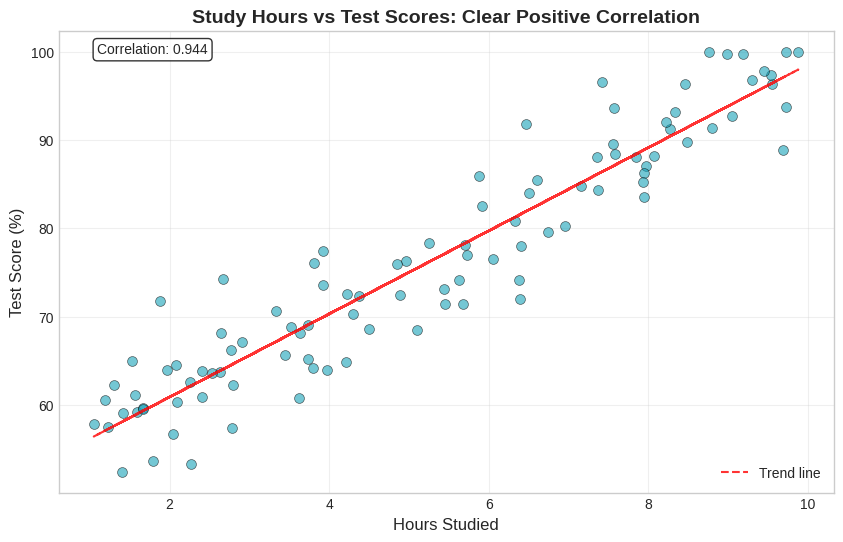

In [4]:
# ============================================
# CELL 4: Creating Scatter Plots with Correlation
# Purpose: Show relationships between variables
# ============================================

# Generate correlated data
np.random.seed(42)
n_points = 100

# Study hours vs test scores (positive correlation)
study_hours = np.random.uniform(1, 10, n_points)
test_scores = 50 + 5 * study_hours + np.random.normal(0, 5, n_points)
test_scores = np.clip(test_scores, 0, 100)  # Keep scores between 0-100

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, test_scores,
           alpha=0.6,           # Transparency to show overlapping points
           s=50,               # Size of points
           color='#17a2b8',    # Color
           edgecolors='black', # Edge color
           linewidth=0.5)      # Edge width

# Add trend line
z = np.polyfit(study_hours, test_scores, 1)
p = np.poly1d(z)
plt.plot(study_hours, p(study_hours), "r--", alpha=0.8, label=f'Trend line')

# Labels and title
plt.title('Study Hours vs Test Scores: Clear Positive Correlation', fontsize=14, fontweight='bold')
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Test Score (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = np.corrcoef(study_hours, test_scores)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

pretty_print("Understanding Correlation",
             f"The correlation coefficient of {correlation:.3f} indicates a strong positive relationship. Learn more about <a href='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient' style='color: #17a2b8;'>Pearson correlation</a>.",
             'info')

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 15px; border-radius: 8px; margin: 20px 0; color: white;">
    <h2 style="color: white; font-size: 16px; margin: 0 0 10px 0; display: flex; align-items: center;">
        <span style="background: rgba(255,255,255,0.2); padding: 4px 8px; border-radius: 12px; font-size: 12px; margin-right: 10px;">HANDS-ON #1</span>
        Create a Multi-Dimensional Scatter Plot
    </h2>
    <p style="color: rgba(255,255,255,0.9); font-size: 13px; margin: 0; line-height: 1.5;">
        Add a third dimension using color and a fourth using size. This teaches how to encode multiple variables.
    </p>
</div>

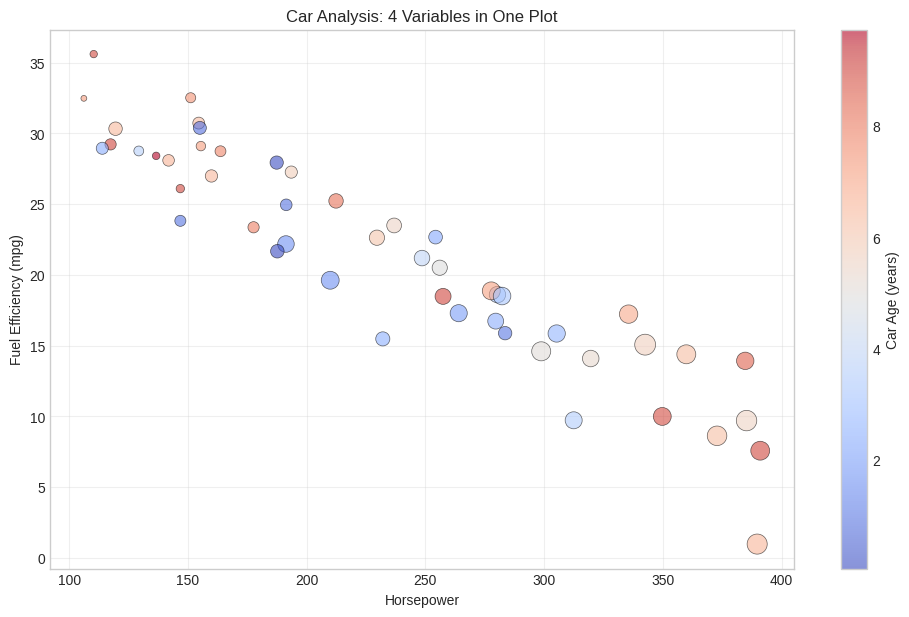

📊 Nikhil, uncomment the code above to create a 4-dimensional visualization!


In [6]:
# ============================================
# HANDS-ON EXERCISE 1: Multi-Dimensional Scatter
# Task: Create scatter plot with 4 variables
# ============================================

# Data: Car features
np.random.seed(42)
n_cars = 50
horsepower = np.random.uniform(100, 400, n_cars)
fuel_efficiency = 40 - 0.08 * horsepower + np.random.normal(0, 3, n_cars)
price = horsepower * 100 + np.random.normal(0, 5000, n_cars)
age = np.random.uniform(0, 10, n_cars)

# TODO: Create figure
plt.figure(figsize=(12, 7))

# TODO: Create scatter plot with:
# - X-axis: horsepower
# - Y-axis: fuel_efficiency
# - Color: age (use c=age, cmap='coolwarm')
# - Size: price (use s=price/200)
scatter = plt.scatter(horsepower, fuel_efficiency,
                     c=age,
                     s=price/200,
                     cmap='coolwarm',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# TODO: Add colorbar to show age scale
plt.colorbar(scatter, label='Car Age (years)')

# TODO: Add labels and title
plt.title('Car Analysis: 4 Variables in One Plot')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency (mpg)')

plt.grid(True, alpha=0.3)
plt.show()

print(f"📊 {student_name}, uncomment the code above to create a 4-dimensional visualization!")

# pretty_print("Exercise Complete!",
#              "Excellent! You've encoded horsepower (x), efficiency (y), age (color), and price (size) in one plot!",
#              'success')

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 3: Histograms - Understanding Distributions</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Histograms reveal the shape of your data's distribution - normal, skewed, or multimodal.
    </p>
</div>

<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">HISTOGRAMS: DISTRIBUTION PATTERNS</h3>
    </div>
    <p style="color: #555; line-height: 1.6; margin: 0 0 15px 0; font-size: 13px;">
        Invented by <a href="https://en.wikipedia.org/wiki/Karl_Pearson" style="color: #17a2b8;">Karl Pearson</a> in 1891, histograms show frequency distributions by dividing data into bins. They reveal central tendency, spread, skewness, and outliers. Understanding <a href="https://en.wikipedia.org/wiki/Normal_distribution" style="color: #17a2b8;">normal distributions</a> is crucial for statistical analysis.
    </p>
    <div style="display: flex; gap: 15px;">
        <div style="flex: 1; background: #e8f5e8; padding: 12px; border-radius: 5px; border-left: 4px solid #28a745;">
            <h4 style="color: #28a745; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Good Use Cases:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Age distributions</li>
                <li>Income distributions</li>
                <li>Test score distributions</li>
                <li>Response time analysis</li>
            </ul>
        </div>
        <div style="flex: 1; background: #fdf2f2; padding: 12px; border-radius: 5px; border-left: 4px solid #dc3545;">
            <h4 style="color: #dc3545; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Bad Use Cases:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Categorical data (use bar charts)</li>
                <li>Time series (use line charts)</li>
                <li>Relationships (use scatter plots)</li>
                <li>Small datasets (< 30 points)</li>
            </ul>
        </div>
    </div>
</div>

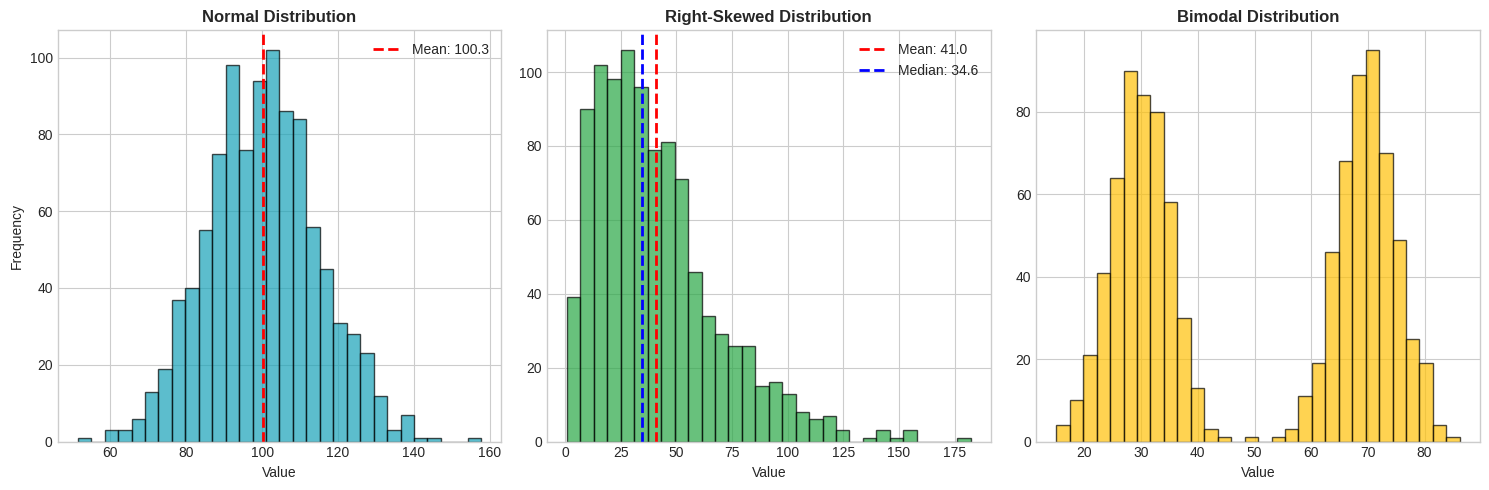

In [7]:
# ============================================
# CELL 5: Creating and Interpreting Histograms
# Purpose: Understand data distributions
# ============================================

# Generate different distributions
np.random.seed(42)

# Normal distribution
normal_data = np.random.normal(100, 15, 1000)

# Skewed distribution
skewed_data = np.random.gamma(2, 2, 1000) * 10

# Bimodal distribution
bimodal_data = np.concatenate([np.random.normal(30, 5, 500),
                               np.random.normal(70, 5, 500)])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Normal distribution
axes[0].hist(normal_data, bins=30, color='#17a2b8', alpha=0.7, edgecolor='black')
axes[0].axvline(normal_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {normal_data.mean():.1f}')
axes[0].set_title('Normal Distribution', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Skewed distribution
axes[1].hist(skewed_data, bins=30, color='#28a745', alpha=0.7, edgecolor='black')
axes[1].axvline(skewed_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {skewed_data.mean():.1f}')
axes[1].axvline(np.median(skewed_data), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(skewed_data):.1f}')
axes[1].set_title('Right-Skewed Distribution', fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].legend()

# Bimodal distribution
axes[2].hist(bimodal_data, bins=30, color='#ffc107', alpha=0.7, edgecolor='black')
axes[2].set_title('Bimodal Distribution', fontweight='bold')
axes[2].set_xlabel('Value')

plt.tight_layout()
plt.show()

pretty_print("Distribution Shapes Tell Stories",
             "Normal: Most values cluster around mean. Skewed: Outliers pull the mean. Bimodal: Two distinct groups exist.",
             'info')

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 15px; border-radius: 8px; margin: 20px 0; color: white;">
    <h2 style="color: white; font-size: 16px; margin: 0 0 10px 0; display: flex; align-items: center;">
        <span style="background: rgba(255,255,255,0.2); padding: 4px 8px; border-radius: 12px; font-size: 12px; margin-right: 10px;">HANDS-ON #2</span>
        Customize Histogram with Statistical Overlays
    </h2>
    <p style="color: rgba(255,255,255,0.9); font-size: 13px; margin: 0; line-height: 1.5;">
        Create a histogram with customized bins and add statistical reference lines.
    </p>
</div>

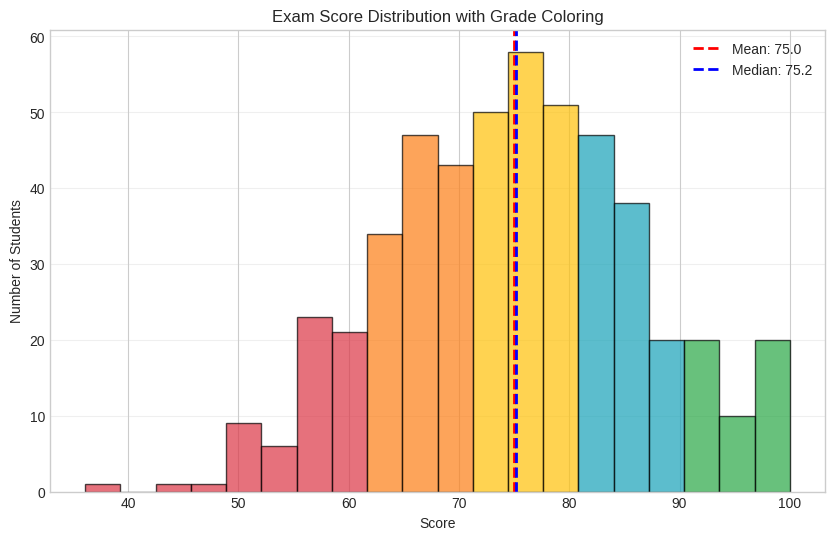

📈 Nikhil, create a grade-colored histogram by uncommenting the code!


In [9]:
# ============================================
# HANDS-ON EXERCISE 2: Advanced Histogram
# Task: Create histogram with statistics overlay
# ============================================

# Generate exam scores
np.random.seed(42)
exam_scores = np.random.normal(75, 12, 500)
exam_scores = np.clip(exam_scores, 0, 100)

# TODO: Create figure
plt.figure(figsize=(10, 6))

# TODO: Create histogram with 20 bins
n, bins, patches = plt.hist(exam_scores,
                           bins=20,
                           color='#17a2b8',
                           alpha=0.7,
                           edgecolor='black')

# TODO: Color bars based on grade (A: >=90, B: >=80, C: >=70, D: >=60, F: <60)
for i, patch in enumerate(patches):
    if bins[i] >= 90:
        patch.set_facecolor('#28a745')  # Green for A
    elif bins[i] >= 80:
        patch.set_facecolor('#17a2b8')  # Blue for B
    elif bins[i] >= 70:
        patch.set_facecolor('#ffc107')  # Yellow for C
    elif bins[i] >= 60:
        patch.set_facecolor('#fd7e14')  # Orange for D
    else:
        patch.set_facecolor('#dc3545')  # Red for F

# TODO: Add statistical lines
plt.axvline(exam_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {exam_scores.mean():.1f}')
plt.axvline(np.median(exam_scores), color='blue', linestyle='--', linewidth=2, label=f'Median: {np.median(exam_scores):.1f}')

# TODO: Add labels
plt.title('Exam Score Distribution with Grade Coloring')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.show()

print(f"📈 {student_name}, create a grade-colored histogram by uncommenting the code!")

pretty_print("Histogram Mastered!",
             "Great work! The color coding instantly shows grade distribution, and statistics provide context.",
             'success')

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 4: Subplots - Telling Complex Stories</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Multiple coordinated plots can tell richer stories than any single visualization.
    </p>
</div>

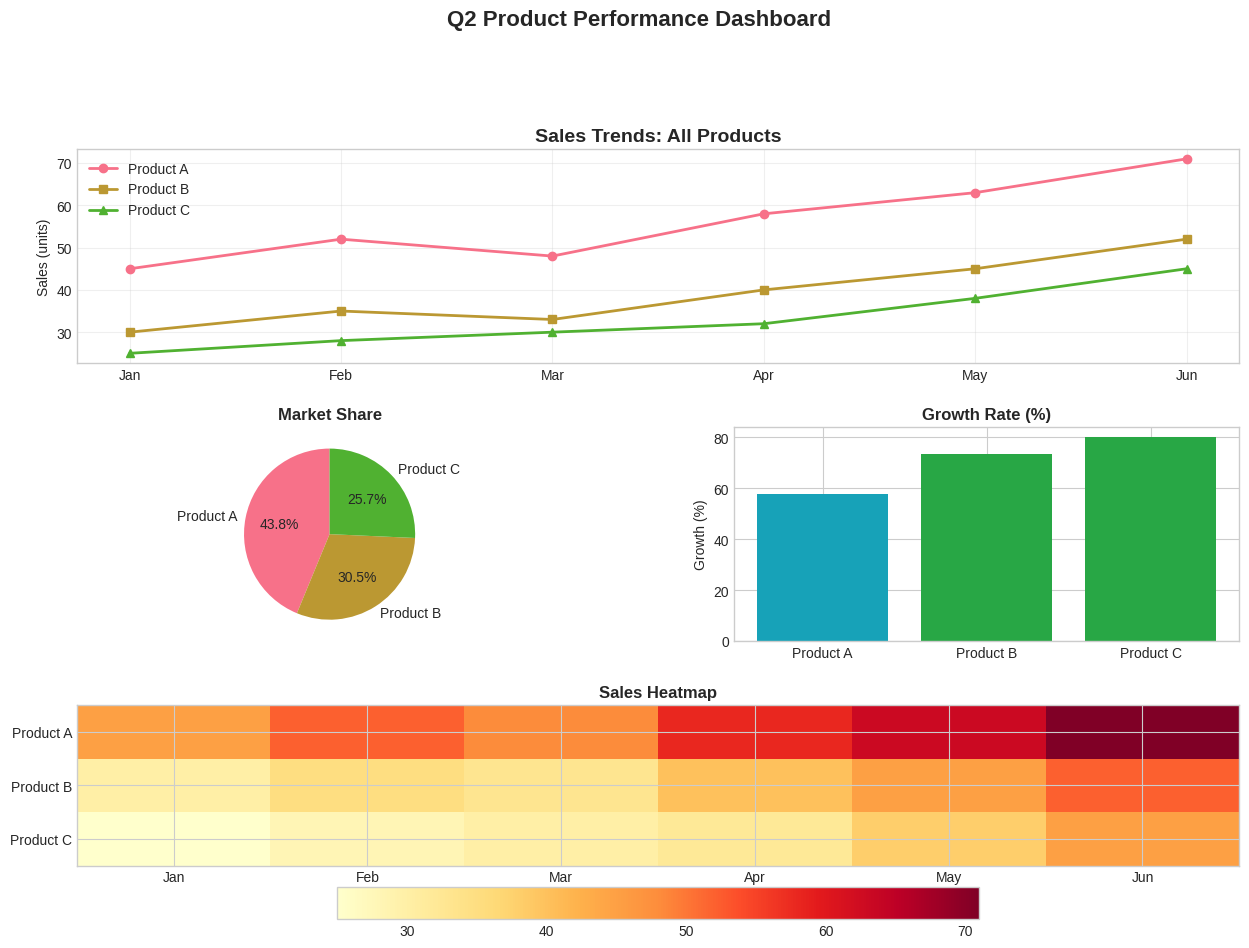

In [10]:
# ============================================
# CELL 6: Creating Effective Subplot Layouts
# Purpose: Build multi-panel visualizations
# ============================================

# Generate related datasets
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Sales data
product_a = [45, 52, 48, 58, 63, 71]
product_b = [30, 35, 33, 40, 45, 52]
product_c = [25, 28, 30, 32, 38, 45]

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# Use GridSpec for flexible layout
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Main plot - Combined trends
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(months, product_a, 'o-', label='Product A', linewidth=2)
ax1.plot(months, product_b, 's-', label='Product B', linewidth=2)
ax1.plot(months, product_c, '^-', label='Product C', linewidth=2)
ax1.set_title('Sales Trends: All Products', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sales (units)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Market share pie chart
ax2 = fig.add_subplot(gs[1, 0])
total_sales = [sum(product_a), sum(product_b), sum(product_c)]
ax2.pie(total_sales, labels=['Product A', 'Product B', 'Product C'],
       autopct='%1.1f%%', startangle=90)
ax2.set_title('Market Share', fontweight='bold')

# Growth rates bar chart
ax3 = fig.add_subplot(gs[1, 1])
growth_rates = [(product_a[-1]/product_a[0] - 1)*100,
               (product_b[-1]/product_b[0] - 1)*100,
               (product_c[-1]/product_c[0] - 1)*100]
bars = ax3.bar(['Product A', 'Product B', 'Product C'], growth_rates,
              color=['#28a745' if g > 60 else '#17a2b8' for g in growth_rates])
ax3.set_title('Growth Rate (%)', fontweight='bold')
ax3.set_ylabel('Growth (%)')

# Monthly performance heatmap
ax4 = fig.add_subplot(gs[2, :])
data_matrix = np.array([product_a, product_b, product_c])
im = ax4.imshow(data_matrix, cmap='YlOrRd', aspect='auto')
ax4.set_xticks(range(len(months)))
ax4.set_xticklabels(months)
ax4.set_yticks(range(3))
ax4.set_yticklabels(['Product A', 'Product B', 'Product C'])
ax4.set_title('Sales Heatmap', fontweight='bold')

# Add colorbar
plt.colorbar(im, ax=ax4, orientation='horizontal', pad=0.1)

# Overall title
fig.suptitle('Q2 Product Performance Dashboard', fontsize=16, fontweight='bold', y=1.02)

plt.show()

pretty_print("Subplot Storytelling",
             "Multiple views of the same data reveal different insights. The dashboard shows trends, proportions, growth, and patterns.",
             'info')

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 15px; border-radius: 8px; margin: 20px 0; color: white;">
    <h2 style="color: white; font-size: 16px; margin: 0 0 10px 0; display: flex; align-items: center;">
        <span style="background: rgba(255,255,255,0.2); padding: 4px 8px; border-radius: 12px; font-size: 12px; margin-right: 10px;">HANDS-ON #3</span>
        Build Your Own Dashboard
    </h2>
    <p style="color: rgba(255,255,255,0.9); font-size: 13px; margin: 0; line-height: 1.5;">
        Create a 4-panel dashboard that tells a complete story about student performance.
    </p>
</div>

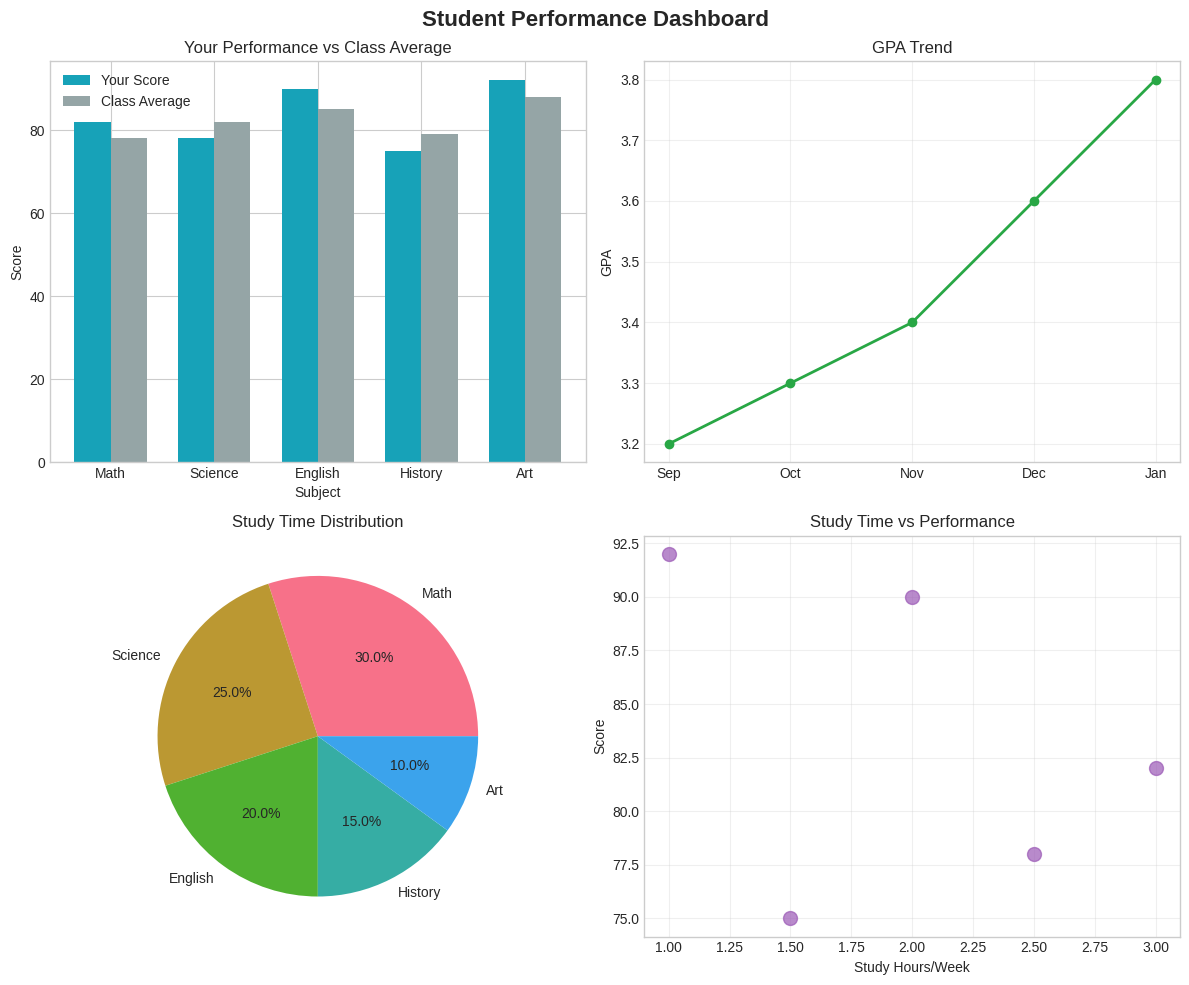

🎯 Nikhil, create your dashboard by uncommenting the code!


In [11]:
# ============================================
# HANDS-ON EXERCISE 3: Create a Dashboard
# Task: Build 4-panel student performance dashboard
# ============================================

# Generate student performance data
np.random.seed(42)
subjects = ['Math', 'Science', 'English', 'History', 'Art']
class_avg = [78, 82, 85, 79, 88]
student_scores = [82, 78, 90, 75, 92]

# TODO: Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# TODO: Panel 1 - Bar chart comparing student vs class average
x = np.arange(len(subjects))
width = 0.35
axes[0, 0].bar(x - width/2, student_scores, width, label='Your Score', color='#17a2b8')
axes[0, 0].bar(x + width/2, class_avg, width, label='Class Average', color='#95a5a6')
axes[0, 0].set_xlabel('Subject')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Your Performance vs Class Average')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(subjects)
axes[0, 0].legend()

# TODO: Panel 2 - Line chart showing improvement
months_progress = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan']
gpa_progress = [3.2, 3.3, 3.4, 3.6, 3.8]
axes[0, 1].plot(months_progress, gpa_progress, 'o-', color='#28a745', linewidth=2)
axes[0, 1].set_title('GPA Trend')
axes[0, 1].set_ylabel('GPA')
axes[0, 1].grid(True, alpha=0.3)

# TODO: Panel 3 - Pie chart of study time distribution
study_distribution = [3, 2.5, 2, 1.5, 1]
axes[1, 0].pie(study_distribution, labels=subjects, autopct='%1.1f%%')
axes[1, 0].set_title('Study Time Distribution')

# TODO: Panel 4 - Scatter plot of study hours vs scores
axes[1, 1].scatter(study_distribution, student_scores, s=100, color='#9b59b6', alpha=0.7)
axes[1, 1].set_xlabel('Study Hours/Week')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Study Time vs Performance')
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('Student Performance Dashboard', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"🎯 {student_name}, create your dashboard by uncommenting the code!")

pretty_print("Dashboard Complete!",
             "Excellent work! Your dashboard tells a complete story about academic performance.",
             'success')

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 5: Color Theory in Data Visualization</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Color isn't just decoration - it encodes information and guides attention.
    </p>
</div>

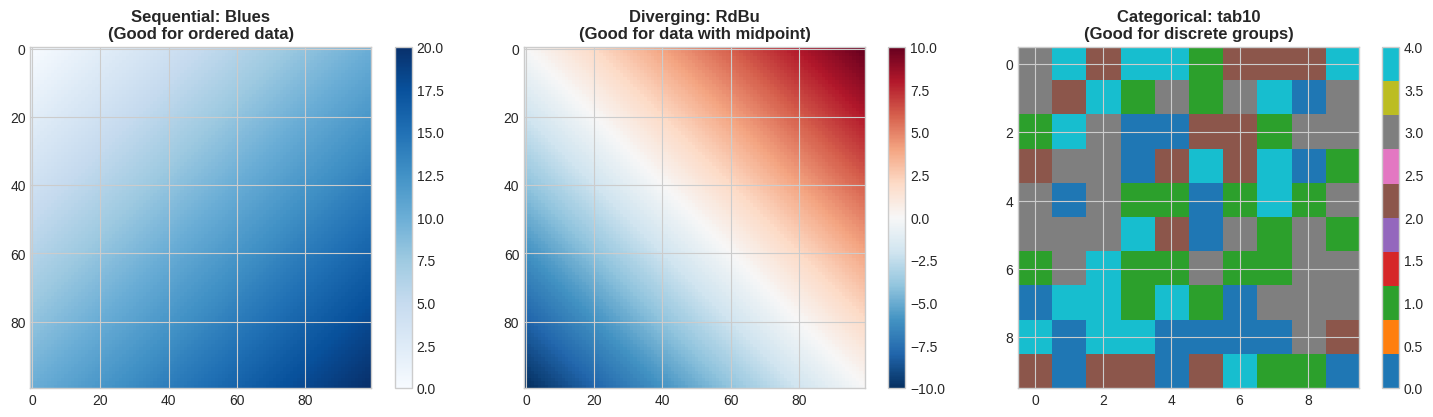

In [ ]:
# ============================================
# CELL 7: Understanding Color Schemes
# Purpose: Demonstrate different color applications
# ============================================

# Create sample data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Different data patterns
sequential_data = X + Y  # Values increase in one direction
diverging_data = X - Y   # Values diverge from center
categorical_data = np.random.randint(0, 5, (10, 10))  # Discrete categories

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sequential colormap
im1 = axes[0].imshow(sequential_data, cmap='Blues')
axes[0].set_title('Sequential: Blues\n(Good for ordered data)', fontweight='bold')
plt.colorbar(im1, ax=axes[0])

# Diverging colormap
im2 = axes[1].imshow(diverging_data, cmap='RdBu_r')
axes[1].set_title('Diverging: RdBu\n(Good for data with midpoint)', fontweight='bold')
plt.colorbar(im2, ax=axes[1])

# Categorical colormap
im3 = axes[2].imshow(categorical_data, cmap='tab10')
axes[2].set_title('Categorical: tab10\n(Good for discrete groups)', fontweight='bold')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

pretty_print("Color Scheme Selection",
             "Learn more about <a href='https://colorbrewer2.org/' style='color: #17a2b8;'>ColorBrewer</a> for choosing appropriate color schemes.",
             'info')

<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">LAB SUMMARY</h3>
    </div>
    <h4 style="color: #17a2b8; font-size: 14px; margin: 0 0 10px 0;">What You Learned:</h4>
    <ul style="color: #555; font-size: 12px; margin: 0 0 15px 0; padding-left: 20px; line-height: 1.6;">
        <li>Visual encoding channels and their effectiveness</li>
        <li>Scatter plots for revealing relationships</li>
        <li>Histograms for understanding distributions</li>
        <li>Subplots for comprehensive dashboards</li>
        <li>Color theory and appropriate scheme selection</li>
    </ul>
    <p style="color: #555; font-size: 12px; margin: 0; font-weight: 600;">
        <strong>Next Lab:</strong> Narrative Structures in Data - Learn to tell compelling stories!
    </p>
</div>

In [12]:
# ============================================
# CELL 8: Lab Completion
# Purpose: Celebrate completion and provide timestamp
# ============================================

from datetime import datetime

completion_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

pretty_print(f"🎉 Congratulations {student_name}!",
             f"You've mastered the Grammar of Graphics! You now understand how visual encoding works and can create scatter plots, histograms, and multi-panel dashboards.",
             'success')

print(f"\n✅ Lab 2 completed at: {completion_time}")
print(f"Great work, {student_name}! You're ready for Lab 3: Narrative Structures in Data!")


✅ Lab 2 completed at: 2025-09-23 01:14:24
Great work, Nikhil! You're ready for Lab 3: Narrative Structures in Data!
